This is the base AlexNet CNN code then i will list out the following modiciations I made to it in seperate code sections.

In [ ]:
# Install & import necessary libraries
!pip install patool==1.12
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from tensorflow.keras import layers, models
import patoolib
from google.colab import drive
import os

# Mount Google Drive
drive.mount('/content/drive')

# Extract the zip file from Google Drive
# patoolib.extract_archive("/content/drive/MyDrive/Hood College/archive.zip", outdir="/content/extracted_images") if the drive is not connected to the program uncomment this line and specify the dir to the zip file or dataset

# define the directory containing the dataset
data_dir = '/content/extracted_images/leapGestRecog'

#load the dataset and split it into training and validation sets
train_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=0.3,  # Reserve 30% for validation
    subset="training",
    seed=123,
    image_size=(227, 227),  # Resize images to 227x227 pixels (AlexNet input size)
    batch_size=32,
    label_mode='categorical'
)

validation_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=0.3,
    subset="validation",
    seed=123,
    image_size=(227, 227),
    batch_size=32,
    label_mode='categorical'
)

# Display class names to verify labels
class_names = train_dataset.class_names
print("Class Names:", class_names)

# Build the AlexNet model architecture
def build_alexnet(input_shape=(227, 227, 3), num_classes=len(class_names)):
    model = models.Sequential([
        layers.Conv2D(96, (11, 11), strides=4, activation='relu', input_shape=input_shape),
        layers.MaxPooling2D((3, 3), strides=2),

        layers.Conv2D(256, (5, 5), padding='same', activation='relu'),
        layers.MaxPooling2D((3, 3), strides=2),

        layers.Conv2D(384, (3, 3), padding='same', activation='relu'),
        layers.Conv2D(384, (3, 3), padding='same', activation='relu'),
        layers.Conv2D(256, (3, 3), padding='same', activation='relu'),
        layers.MaxPooling2D((3, 3), strides=2),

        layers.Flatten(),
        layers.Dense(4096, activation='relu'),
        layers.Dropout(0.5),

        layers.Dense(4096, activation='relu'),
        layers.Dropout(0.5),

        layers.Dense(num_classes, activation='softmax')
    ])
    return model

# Create the AlexNet model
alexnet_model = build_alexnet()

# Compile the model
alexnet_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Print the model summary
alexnet_model.summary()

# Train the model
history = alexnet_model.fit(
    train_dataset,
    validation_data=validation_dataset,
    epochs=5 # reduced epochs for testing purposes, increase to 10 to get better results.
)

# evaluate the model on the validation set
val_loss, val_acc = alexnet_model.evaluate(validation_dataset, verbose=2)
print(f"Validation accuracy: {val_acc:.4f}")

# plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy for AlexNet')
plt.show()


Testing different batch sizes

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).

Training with Batch Size = 16

Found 20000 files belonging to 10 classes.
Using 14000 files for training.
Found 20000 files belonging to 10 classes.
Using 6000 files for validation.
Epoch 1/5
875/875 ━━━━━━━━━━━━━━━━━━━━ 18s 12ms/step - accuracy: 0.5352 - loss: 5.9361 - val_accuracy: 0.4847 - val_loss: 14.1985
Epoch 2/5
875/875 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - accuracy: 0.7125 - loss: 1.0621 - val_accuracy: 0.8392 - val_loss: 0.5375
Epoch 3/5
875/875 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - accuracy: 0.7426 - loss: 0.9075 - val_accuracy: 0.6030 - val_loss: 1.2467
Epoch 4/5
875/875 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - accuracy: 0.5751 - loss: 1.2142 - val_accuracy: 0.8815 - val_loss: 0.5309
Epoch 5/5
875/875 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - accuracy: 0.6960 - loss: 0.9008 - val_accuracy: 0.8453 - val_loss: 0.3265
375/375 - 2s - 6ms/step - accuracy: 0.8453 -

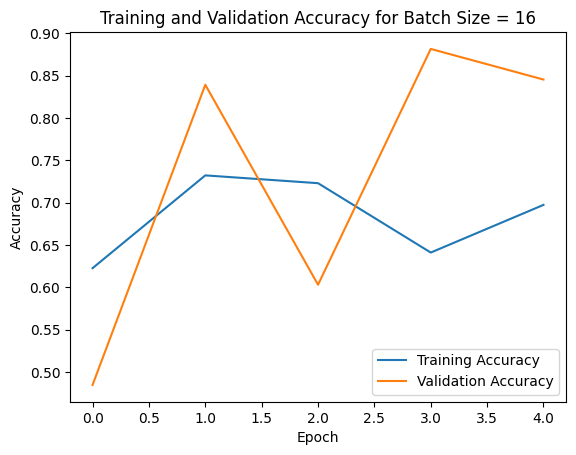


Training with Batch Size = 32

Found 20000 files belonging to 10 classes.
Using 14000 files for training.
Found 20000 files belonging to 10 classes.
Using 6000 files for validation.
Epoch 1/5
438/438 ━━━━━━━━━━━━━━━━━━━━ 19s 28ms/step - accuracy: 0.3958 - loss: 6.3730 - val_accuracy: 0.4207 - val_loss: 3.5634
Epoch 2/5
438/438 ━━━━━━━━━━━━━━━━━━━━ 7s 17ms/step - accuracy: 0.6311 - loss: 1.1428 - val_accuracy: 0.6697 - val_loss: 0.8149
Epoch 3/5
438/438 ━━━━━━━━━━━━━━━━━━━━ 7s 17ms/step - accuracy: 0.6636 - loss: 1.0059 - val_accuracy: 0.7917 - val_loss: 0.4576
Epoch 4/5
438/438 ━━━━━━━━━━━━━━━━━━━━ 7s 16ms/step - accuracy: 0.6923 - loss: 0.8444 - val_accuracy: 0.7968 - val_loss: 0.5165
Epoch 5/5
438/438 ━━━━━━━━━━━━━━━━━━━━ 7s 17ms/step - accuracy: 0.6792 - loss: 0.8995 - val_accuracy: 0.8958 - val_loss: 0.2937
188/188 - 2s - 10ms/step - accuracy: 0.8958 - loss: 0.2937
Validation accuracy for Batch Size = 32: 0.8958


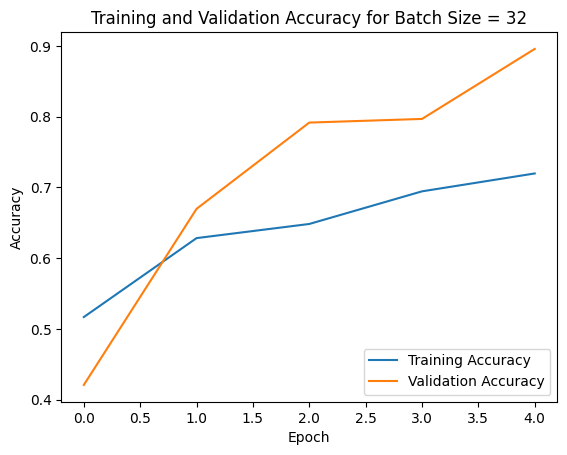


Training with Batch Size = 64

Found 20000 files belonging to 10 classes.
Using 14000 files for training.
Found 20000 files belonging to 10 classes.
Using 6000 files for validation.
Epoch 1/5
219/219 ━━━━━━━━━━━━━━━━━━━━ 32s 95ms/step - accuracy: 0.5571 - loss: 7.1389 - val_accuracy: 0.7692 - val_loss: 0.7084
Epoch 2/5
219/219 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - accuracy: 0.8903 - loss: 0.4093 - val_accuracy: 0.9068 - val_loss: 0.2311
Epoch 3/5
219/219 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - accuracy: 0.9381 - loss: 0.2744 - val_accuracy: 0.9503 - val_loss: 0.1654
Epoch 4/5
219/219 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - accuracy: 0.9162 - loss: 0.4349 - val_accuracy: 0.7618 - val_loss: 1.5489
Epoch 5/5
219/219 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - accuracy: 0.9534 - loss: 0.2130 - val_accuracy: 0.9193 - val_loss: 0.2339
94/94 - 2s - 22ms/step - accuracy: 0.9193 - loss: 0.2339
Validation accuracy for Batch Size = 64: 0.9193


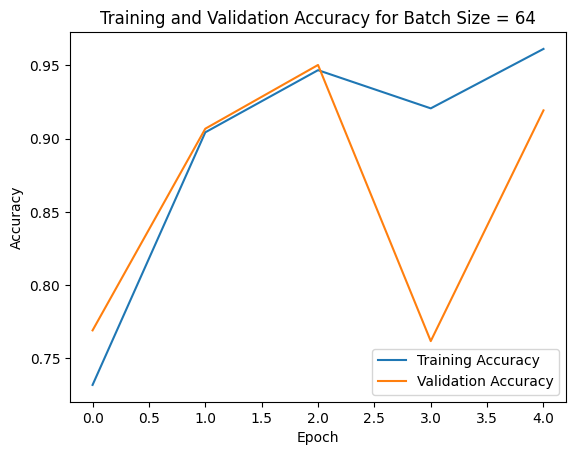


Training with Batch Size = 128

Found 20000 files belonging to 10 classes.
Using 14000 files for training.
Found 20000 files belonging to 10 classes.
Using 6000 files for validation.
Epoch 1/5
110/110 ━━━━━━━━━━━━━━━━━━━━ 29s 166ms/step - accuracy: 0.4797 - loss: 11.9574 - val_accuracy: 0.2338 - val_loss: 12.5019
Epoch 2/5
110/110 ━━━━━━━━━━━━━━━━━━━━ 7s 61ms/step - accuracy: 0.9045 - loss: 0.2954 - val_accuracy: 0.7348 - val_loss: 1.2053
Epoch 3/5
110/110 ━━━━━━━━━━━━━━━━━━━━ 7s 60ms/step - accuracy: 0.9556 - loss: 0.1559 - val_accuracy: 0.8912 - val_loss: 0.3958
Epoch 4/5
110/110 ━━━━━━━━━━━━━━━━━━━━ 7s 60ms/step - accuracy: 0.9683 - loss: 0.1172 - val_accuracy: 0.9022 - val_loss: 0.5761
Epoch 5/5
110/110 ━━━━━━━━━━━━━━━━━━━━ 7s 61ms/step - accuracy: 0.9721 - loss: 0.1215 - val_accuracy: 0.7860 - val_loss: 1.4462
47/47 - 2s - 41ms/step - accuracy: 0.7860 - loss: 1.4462
Validation accuracy for Batch Size = 128: 0.7860


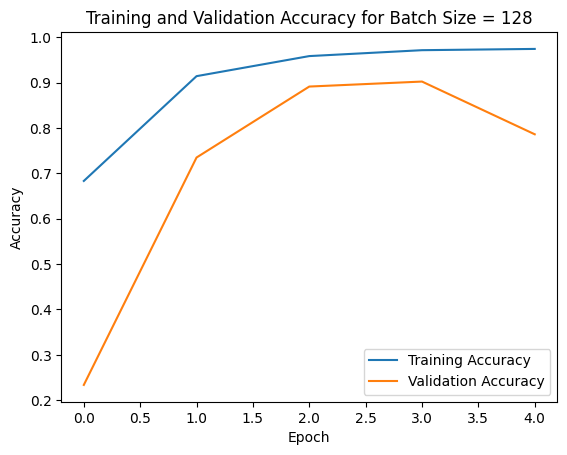

In [9]:
# Install necessary libraries
!pip install patool==1.12

# Import necessary libraries
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from tensorflow.keras import layers, models
import patoolib
from google.colab import drive
import os

# Mount Google Drive
drive.mount('/content/drive')

# Extract the zip file from Google Drive
#patoolib.extract_archive("/content/drive/MyDrive/Hood College/archive.zip", outdir="/content/extracted_images")

# Define the directory containing the dataset
data_dir = '/content/extracted_images/leapGestRecog'

# Function to load dataset with a specified batch size
def load_dataset(batch_size):
    train_dataset = tf.keras.preprocessing.image_dataset_from_directory(
        data_dir,
        validation_split=0.3,
        subset="training",
        seed=123,
        image_size=(227, 227),
        batch_size=batch_size,
        label_mode='categorical'
    )

    validation_dataset = tf.keras.preprocessing.image_dataset_from_directory(
        data_dir,
        validation_split=0.3,
        subset="validation",
        seed=123,
        image_size=(227, 227),
        batch_size=batch_size,
        label_mode='categorical'
    )
    return train_dataset, validation_dataset

# Build AlexNet model with Batch Normalization applied for more consistant results
def build_alexnet_with_bn(input_shape=(227, 227, 3), num_classes=10):
    model = models.Sequential([
        layers.Conv2D(96, (11, 11), strides=4, activation='relu', input_shape=input_shape),
        layers.BatchNormalization(),
        layers.MaxPooling2D((3, 3), strides=2),

        layers.Conv2D(256, (5, 5), padding='same', activation='relu'),
        layers.BatchNormalization(),
        layers.MaxPooling2D((3, 3), strides=2),

        layers.Conv2D(384, (3, 3), padding='same', activation='relu'),
        layers.BatchNormalization(),
        layers.Conv2D(384, (3, 3), padding='same', activation='relu'),
        layers.BatchNormalization(),
        layers.Conv2D(256, (3, 3), padding='same', activation='relu'),
        layers.BatchNormalization(),
        layers.MaxPooling2D((3, 3), strides=2),

        layers.Flatten(),
        layers.Dense(4096, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(4096, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation='softmax')
    ])
    return model

# Define a function to train the model with different batch sizes
def train_with_batch_size(batch_size):
    print(f"\nTraining with Batch Size = {batch_size}\n")

    # Load the dataset with the given batch size
    train_dataset, validation_dataset = load_dataset(batch_size)


    alexnet_model = build_alexnet_with_bn()

    # compile the model
    alexnet_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    # train the model
    history = alexnet_model.fit(
        train_dataset,
        validation_data=validation_dataset,
        epochs=5 # reduced to 5 for testing purpose increase t o10 for better results
    )

    #evaluate the model on the validation set
    val_loss, val_acc = alexnet_model.evaluate(validation_dataset, verbose=2)
    print(f"Validation accuracy for Batch Size = {batch_size}: {val_acc:.4f}")

    # Plot the training and validation accuracy
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(loc='lower right')
    plt.title(f'Training and Validation Accuracy for Batch Size = {batch_size}')
    plt.show()

# Test different batch sizes and gather results
batch_sizes = [16, 32, 64, 128]

for batch_size in batch_sizes:
    train_with_batch_size(batch_size)


Testing with data augmentation

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).

Training with Batch Size = 32 and Data Augmentation (Flip, Rotate, Scale)

Found 14000 images belonging to 10 classes.
Found 6000 images belonging to 10 classes.
Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


438/438 ━━━━━━━━━━━━━━━━━━━━ 246s 539ms/step - accuracy: 0.3185 - loss: 7.2536 - val_accuracy: 0.3393 - val_loss: 2.2926
Epoch 2/5
438/438 ━━━━━━━━━━━━━━━━━━━━ 234s 528ms/step - accuracy: 0.4113 - loss: 1.7115 - val_accuracy: 0.3282 - val_loss: 2.1543
Epoch 3/5
438/438 ━━━━━━━━━━━━━━━━━━━━ 233s 526ms/step - accuracy: 0.4182 - loss: 1.6642 - val_accuracy: 0.2928 - val_loss: 1.9640
Epoch 4/5
438/438 ━━━━━━━━━━━━━━━━━━━━ 234s 528ms/step - accuracy: 0.4327 - loss: 1.5271 - val_accuracy: 0.3980 - val_loss: 2.0681
Epoch 5/5
438/438 ━━━━━━━━━━━━━━━━━━━━ 233s 527ms/step - accuracy: 0.4267 - loss: 1.5939 - val_accuracy: 0.5177 - val_loss: 1.5299
188/188 - 69s - 370ms/step - accuracy: 0.5173 - loss: 1.5046
Validation accuracy for Batch Size = 32 with Data Augmentation: 0.5173


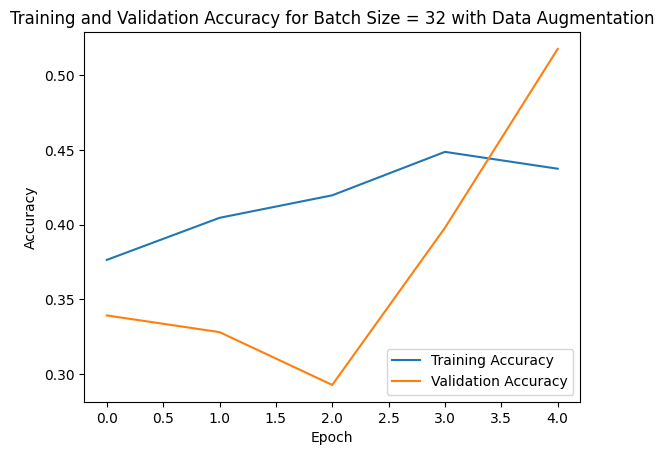

In [10]:
# Install necessary libraries
!pip install patool==1.12

# Import necessary libraries
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from tensorflow.keras import layers, models
import patoolib
from google.colab import drive
import os

# Mount Google Drive
drive.mount('/content/drive')

# Extract the zip file from Google Drive
# patoolib.extract_archive("/content/drive/MyDrive/Hood College/archive.zip", outdir="/content/extracted_images")

# Define the directory containing the dataset
data_dir = '/content/extracted_images/leapGestRecog'

# Function for loading dataset with data augmentation adjustments
def load_dataset_with_augmentation(batch_size):
    datagen = ImageDataGenerator(
        validation_split=0.3,
        rotation_range=20,  # rotate images up to 20 degrees
        horizontal_flip=True,  # flip images horizontally
        zoom_range=0.2  #scale up by 20%
    )

    train_dataset = datagen.flow_from_directory(
        data_dir,
        target_size=(227, 227),
        batch_size=batch_size,
        class_mode='categorical',
        subset='training',  # set as training data
        seed=123
    )

    validation_dataset = datagen.flow_from_directory(
        data_dir,
        target_size=(227, 227),
        batch_size=batch_size,
        class_mode='categorical',
        subset='validation',  # set as validation data
        seed=123
    )
    return train_dataset, validation_dataset

# build AlexNet model
def build_alexnet_with_bn(input_shape=(227, 227, 3), num_classes=10):
    model = models.Sequential([
        layers.Conv2D(96, (11, 11), strides=4, activation='relu', input_shape=input_shape),
        layers.BatchNormalization(),
        layers.MaxPooling2D((3, 3), strides=2),

        layers.Conv2D(256, (5, 5), padding='same', activation='relu'),
        layers.BatchNormalization(),
        layers.MaxPooling2D((3, 3), strides=2),

        layers.Conv2D(384, (3, 3), padding='same', activation='relu'),
        layers.BatchNormalization(),
        layers.Conv2D(384, (3, 3), padding='same', activation='relu'),
        layers.BatchNormalization(),
        layers.Conv2D(256, (3, 3), padding='same', activation='relu'),
        layers.BatchNormalization(),
        layers.MaxPooling2D((3, 3), strides=2),

        layers.Flatten(),
        layers.Dense(4096, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(4096, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation='softmax')
    ])
    return model

# Define a function to train the model with data augmentation
def train_with_data_augmentation(batch_size):
    print(f"\nTraining with Batch Size = {batch_size} and Data Augmentation (Flip, Rotate, Scale)\n")


    train_dataset, validation_dataset = load_dataset_with_augmentation(batch_size)

    # create the AlexNet model
    alexnet_model = build_alexnet_with_bn()

    # compile the model
    alexnet_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    # train the model
    history = alexnet_model.fit(
        train_dataset,
        validation_data=validation_dataset,
        epochs=5  # Adjust the number of epochs as needed (decresed from 10 to 5 for testing)
    )

    #evaluate the model on the validation set
    val_loss, val_acc = alexnet_model.evaluate(validation_dataset, verbose=2)
    print(f"Validation accuracy for Batch Size = {batch_size} with Data Augmentation: {val_acc:.4f}")

    # plot the training and validation accuracy
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(loc='lower right')
    plt.title(f'Training and Validation Accuracy for Batch Size = {batch_size} with Data Augmentation')
    plt.show()

# fixed batch size of 32
train_with_data_augmentation(batch_size=32)


This section tests different learning rates for AlexNet [0.1, 0.01, 0.001, 0.0001]

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).

Training with Learning Rate = 0.1

Found 20000 files belonging to 10 classes.
Using 14000 files for training.
Found 20000 files belonging to 10 classes.
Using 6000 files for validation.
Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


438/438 ━━━━━━━━━━━━━━━━━━━━ 18s 27ms/step - accuracy: 0.1312 - loss: 74197.4141 - val_accuracy: 0.1040 - val_loss: 2.3461
Epoch 2/5
438/438 ━━━━━━━━━━━━━━━━━━━━ 7s 16ms/step - accuracy: 0.1044 - loss: 17.4226 - val_accuracy: 0.1035 - val_loss: 2.6366
Epoch 3/5
438/438 ━━━━━━━━━━━━━━━━━━━━ 7s 17ms/step - accuracy: 0.1039 - loss: 2.9255 - val_accuracy: 0.1025 - val_loss: 2.3058
Epoch 4/5
438/438 ━━━━━━━━━━━━━━━━━━━━ 7s 16ms/step - accuracy: 0.0958 - loss: 732.6860 - val_accuracy: 0.0965 - val_loss: 2.3113
Epoch 5/5
438/438 ━━━━━━━━━━━━━━━━━━━━ 7s 17ms/step - accuracy: 0.0946 - loss: 2.8703 - val_accuracy: 0.0965 - val_loss: 2.3141
188/188 - 2s - 10ms/step - accuracy: 0.0965 - loss: 2.3141
Validation accuracy for Learning Rate = 0.1: 0.0965


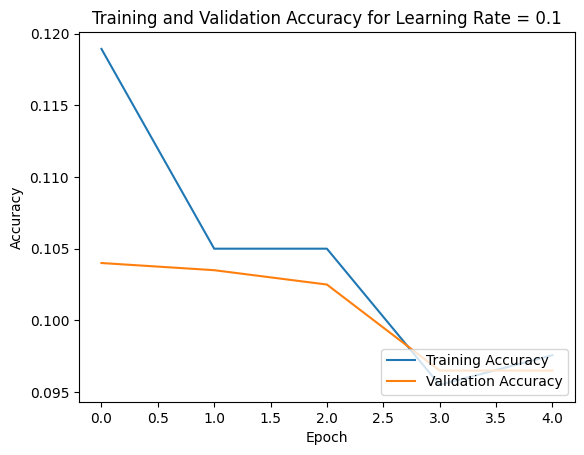


Training with Learning Rate = 0.01

Found 20000 files belonging to 10 classes.
Using 14000 files for training.
Found 20000 files belonging to 10 classes.
Using 6000 files for validation.
Epoch 1/5
438/438 ━━━━━━━━━━━━━━━━━━━━ 18s 27ms/step - accuracy: 0.1886 - loss: 130.0612 - val_accuracy: 0.1110 - val_loss: 2.3238
Epoch 2/5
438/438 ━━━━━━━━━━━━━━━━━━━━ 7s 17ms/step - accuracy: 0.1135 - loss: 11.2283 - val_accuracy: 0.1002 - val_loss: 2.8290
Epoch 3/5
438/438 ━━━━━━━━━━━━━━━━━━━━ 8s 18ms/step - accuracy: 0.0971 - loss: 2.3050 - val_accuracy: 0.0993 - val_loss: 2.3034
Epoch 4/5
438/438 ━━━━━━━━━━━━━━━━━━━━ 7s 17ms/step - accuracy: 0.0926 - loss: 2.3043 - val_accuracy: 0.0993 - val_loss: 2.3032
Epoch 5/5
438/438 ━━━━━━━━━━━━━━━━━━━━ 7s 16ms/step - accuracy: 0.0907 - loss: 2.3042 - val_accuracy: 0.0993 - val_loss: 2.3033
188/188 - 2s - 11ms/step - accuracy: 0.0993 - loss: 2.3033
Validation accuracy for Learning Rate = 0.01: 0.0993


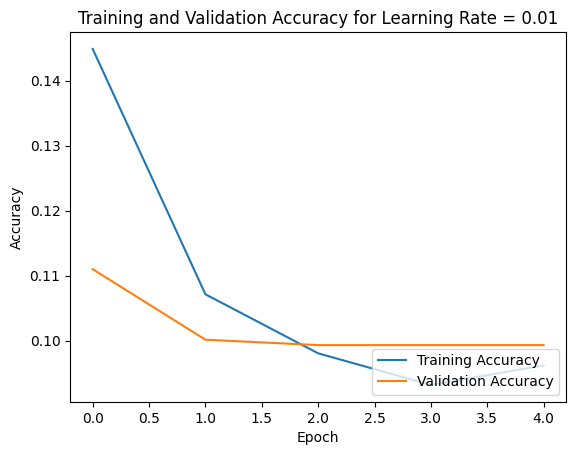


Training with Learning Rate = 0.001

Found 20000 files belonging to 10 classes.
Using 14000 files for training.
Found 20000 files belonging to 10 classes.
Using 6000 files for validation.
Epoch 1/5
438/438 ━━━━━━━━━━━━━━━━━━━━ 19s 27ms/step - accuracy: 0.4957 - loss: 5.6314 - val_accuracy: 0.6183 - val_loss: 1.4535
Epoch 2/5
438/438 ━━━━━━━━━━━━━━━━━━━━ 7s 17ms/step - accuracy: 0.7460 - loss: 0.7653 - val_accuracy: 0.7443 - val_loss: 1.0316
Epoch 3/5
438/438 ━━━━━━━━━━━━━━━━━━━━ 7s 16ms/step - accuracy: 0.7338 - loss: 0.9911 - val_accuracy: 0.9013 - val_loss: 0.3591
Epoch 4/5
438/438 ━━━━━━━━━━━━━━━━━━━━ 7s 17ms/step - accuracy: 0.8208 - loss: 0.5218 - val_accuracy: 0.9792 - val_loss: 0.0975
Epoch 5/5
438/438 ━━━━━━━━━━━━━━━━━━━━ 7s 16ms/step - accuracy: 0.8790 - loss: 0.3514 - val_accuracy: 0.9708 - val_loss: 0.0872
188/188 - 2s - 10ms/step - accuracy: 0.9708 - loss: 0.0872
Validation accuracy for Learning Rate = 0.001: 0.9708


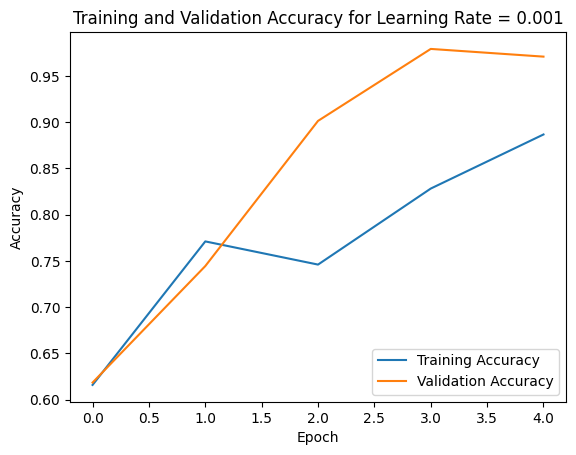


Training with Learning Rate = 0.0001

Found 20000 files belonging to 10 classes.
Using 14000 files for training.
Found 20000 files belonging to 10 classes.
Using 6000 files for validation.
Epoch 1/5
438/438 ━━━━━━━━━━━━━━━━━━━━ 19s 26ms/step - accuracy: 0.6054 - loss: 2.1027 - val_accuracy: 0.9603 - val_loss: 0.1346
Epoch 2/5
438/438 ━━━━━━━━━━━━━━━━━━━━ 7s 17ms/step - accuracy: 0.9692 - loss: 0.1030 - val_accuracy: 0.9872 - val_loss: 0.0449
Epoch 3/5
438/438 ━━━━━━━━━━━━━━━━━━━━ 7s 17ms/step - accuracy: 0.9778 - loss: 0.0917 - val_accuracy: 0.9892 - val_loss: 0.0226
Epoch 4/5
438/438 ━━━━━━━━━━━━━━━━━━━━ 7s 17ms/step - accuracy: 0.9711 - loss: 0.1270 - val_accuracy: 0.8922 - val_loss: 0.6388
Epoch 5/5
438/438 ━━━━━━━━━━━━━━━━━━━━ 7s 16ms/step - accuracy: 0.9748 - loss: 0.1178 - val_accuracy: 0.9432 - val_loss: 0.3532
188/188 - 2s - 10ms/step - accuracy: 0.9432 - loss: 0.3532
Validation accuracy for Learning Rate = 0.0001: 0.9432


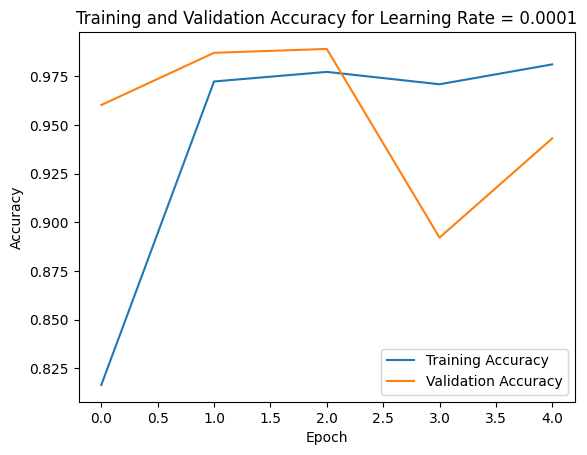

In [11]:
# Install necessary libraries
!pip install patool==1.12

# Import necessary libraries
import tensorflow as tf
from tensorflow.keras import layers, models, optimizers
import matplotlib.pyplot as plt
import patoolib
from google.colab import drive
import os

# Mount Google Drive
drive.mount('/content/drive')

# Extract the zip file from Google Drive
#patoolib.extract_archive("/content/drive/MyDrive/Hood College/archive.zip", outdir="/content/extracted_images")

# define the directory containing the dataset
data_dir = '/content/extracted_images/leapGestRecog'

# Function for loading the dataset
def load_dataset(batch_size):
    train_dataset = tf.keras.preprocessing.image_dataset_from_directory(
        data_dir,
        validation_split=0.3,
        subset="training",
        seed=123,
        image_size=(227, 227),
        batch_size=batch_size,
        label_mode='categorical'
    )

    validation_dataset = tf.keras.preprocessing.image_dataset_from_directory(
        data_dir,
        validation_split=0.3,
        subset="validation",
        seed=123,
        image_size=(227, 227),
        batch_size=batch_size,
        label_mode='categorical'
    )
    return train_dataset, validation_dataset

# Build AlexNet model
def build_alexnet_with_bn(input_shape=(227, 227, 3), num_classes=10):
    model = models.Sequential([
        layers.Conv2D(96, (11, 11), strides=4, activation='relu', input_shape=input_shape),
        layers.BatchNormalization(),
        layers.MaxPooling2D((3, 3), strides=2),

        layers.Conv2D(256, (5, 5), padding='same', activation='relu'),
        layers.BatchNormalization(),
        layers.MaxPooling2D((3, 3), strides=2),

        layers.Conv2D(384, (3, 3), padding='same', activation='relu'),
        layers.BatchNormalization(),
        layers.Conv2D(384, (3, 3), padding='same', activation='relu'),
        layers.BatchNormalization(),
        layers.Conv2D(256, (3, 3), padding='same', activation='relu'),
        layers.BatchNormalization(),
        layers.MaxPooling2D((3, 3), strides=2),

        layers.Flatten(),
        layers.Dense(4096, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(4096, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation='softmax')
    ])
    return model

# function to train the model with different learning rates
def train_with_learning_rates(batch_size, learning_rates):
    for lr in learning_rates:
        print(f"\nTraining with Learning Rate = {lr}\n")

        # Load the dataset with the given batch size
        train_dataset, validation_dataset = load_dataset(batch_size)

        alexnet_model = build_alexnet_with_bn()

        # compile the model with different learning rates
        optimizer = optimizers.Adam(learning_rate=lr)
        alexnet_model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

        # train the model
        history = alexnet_model.fit(
            train_dataset,
            validation_data=validation_dataset,
            epochs=5  # adjust the number of epochs as needed (fom 10 to 5 for testing purpose)
        )

        # evaluate the model on the validation set
        val_loss, val_acc = alexnet_model.evaluate(validation_dataset, verbose=2)
        print(f"Validation accuracy for Learning Rate = {lr}: {val_acc:.4f}")

        #plot the training and validation accuracy
        plt.plot(history.history['accuracy'], label='Training Accuracy')
        plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
        plt.xlabel('Epoch')
        plt.ylabel('Accuracy')
        plt.legend(loc='lower right')
        plt.title(f'Training and Validation Accuracy for Learning Rate = {lr}')
        plt.show()

# testing with a fixed batch size and different learning rates
learning_rates = [0.1, 0.01, 0.001, 0.0001]  # learning rates to test
train_with_learning_rates(batch_size=32, learning_rates=learning_rates)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).

Training with RMSprop Optimizer and Learning Rate = 0.001

Found 20000 files belonging to 10 classes.
Using 14000 files for training.
Found 20000 files belonging to 10 classes.
Using 6000 files for validation.
Epoch 1/10
438/438 ━━━━━━━━━━━━━━━━━━━━ 18s 27ms/step - accuracy: 0.3446 - loss: 17.4043 - val_accuracy: 0.3297 - val_loss: 13.9111
Epoch 2/10
438/438 ━━━━━━━━━━━━━━━━━━━━ 8s 17ms/step - accuracy: 0.9344 - loss: 0.3999 - val_accuracy: 0.8958 - val_loss: 0.8340
Epoch 3/10
438/438 ━━━━━━━━━━━━━━━━━━━━ 7s 16ms/step - accuracy: 0.9691 - loss: 0.2301 - val_accuracy: 0.9275 - val_loss: 0.6043
Epoch 4/10
438/438 ━━━━━━━━━━━━━━━━━━━━ 7s 16ms/step - accuracy: 0.9784 - loss: 0.1747 - val_accuracy: 0.9840 - val_loss: 0.0675
Epoch 5/10
438/438 ━━━━━━━━━━━━━━━━━━━━ 7s 16ms/step - accuracy: 0.9845 - loss: 0.1064 - val_accuracy: 0.9753 - val_loss: 0.2008
Epoch 6/10
4

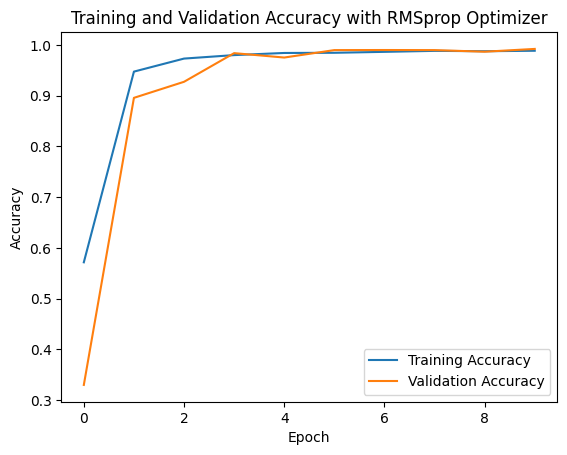

In [13]:
# Install necessary libraries
!pip install patool==1.12

# Import necessary libraries
import tensorflow as tf
from tensorflow.keras import layers, models, optimizers
import matplotlib.pyplot as plt
import patoolib
from google.colab import drive
import os

# Mount Google Drive
drive.mount('/content/drive')

# Extract the zip file from Google Drive
#patoolib.extract_archive("/content/drive/MyDrive/Hood College/archive.zip", outdir="/content/extracted_images")

# Define the directory containing the dataset
data_dir = '/content/extracted_images/leapGestRecog'

# Function for loading the dataset
def load_dataset(batch_size):
    train_dataset = tf.keras.preprocessing.image_dataset_from_directory(
        data_dir,
        validation_split=0.3,
        subset="training",
        seed=123,
        image_size=(227, 227),
        batch_size=batch_size,
        label_mode='categorical'
    )

    validation_dataset = tf.keras.preprocessing.image_dataset_from_directory(
        data_dir,
        validation_split=0.3,
        subset="validation",
        seed=123,
        image_size=(227, 227),
        batch_size=batch_size,
        label_mode='categorical'
    )
    return train_dataset, validation_dataset

# Build AlexNet model with Batch Normalization
def build_alexnet_with_bn(input_shape=(227, 227, 3), num_classes=10):
    model = models.Sequential([
        layers.Conv2D(96, (11, 11), strides=4, activation='relu', input_shape=input_shape),
        layers.BatchNormalization(),
        layers.MaxPooling2D((3, 3), strides=2),

        layers.Conv2D(256, (5, 5), padding='same', activation='relu'),
        layers.BatchNormalization(),
        layers.MaxPooling2D((3, 3), strides=2),

        layers.Conv2D(384, (3, 3), padding='same', activation='relu'),
        layers.BatchNormalization(),
        layers.Conv2D(384, (3, 3), padding='same', activation='relu'),
        layers.BatchNormalization(),
        layers.Conv2D(256, (3, 3), padding='same', activation='relu'),
        layers.BatchNormalization(),
        layers.MaxPooling2D((3, 3), strides=2),

        layers.Flatten(),
        layers.Dense(4096, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(4096, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation='softmax')
    ])
    return model

# Function to train the model with RMSprop optimizer
def train_with_rmsprop(batch_size, learning_rate=0.001):
    print(f"\nTraining with RMSprop Optimizer and Learning Rate = {learning_rate}\n")

    # Load the dataset with the given batch size
    train_dataset, validation_dataset = load_dataset(batch_size)

    # Create the AlexNet model with Batch Normalization
    alexnet_model = build_alexnet_with_bn()

    # Compile the model with RMSprop optimizer
    optimizer = optimizers.RMSprop(learning_rate=learning_rate)
    alexnet_model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

    # Train the model
    history = alexnet_model.fit(
        train_dataset,
        validation_data=validation_dataset,
        epochs=10  # Adjust the number of epochs as needed
    )

    # Evaluate the model on the validation set
    val_loss, val_acc = alexnet_model.evaluate(validation_dataset, verbose=2)
    print(f"Validation accuracy: {val_acc:.4f}")

    # Plot the training and validation accuracy
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(loc='lower right')
    plt.title(f'Training and Validation Accuracy with RMSprop Optimizer')
    plt.show()

# Test with a fixed batch size and RMSprop optimizer
train_with_rmsprop(batch_size=32, learning_rate=0.001)
